In [23]:
import pandas as pd
import matplotlib.pyplot as plt # To create the plot
import seaborn as sns
import numpy as np
#import plotly.express as px 

### Read the dataset after preprocessing

In [24]:
tadawul_stuks = pd.read_csv('Tadawul_stcks_clean.csv')

In [25]:
# look frist five rows 
tadawul_stuks.head()

,trading_name,sector,date,open_price,high_price,low_price,close_price,change,perc_Change,volume_traded,value_traded,num_trades,Year,month,day,Change_category
0,SARCO,Energy,2020-03-05,35.55,35.85,34.90,34.90,-0.40,-1.13,436609.0,15399073.50,804.0,2020,March,Thursday,Bad Change
1,SARCO,Energy,2020-03-04,34.70,35.65,34.50,35.30,0.25,0.71,737624.0,25981391.35,1268.0,2020,March,Wednesday,Good Change
2,SARCO,Energy,2020-03-03,34.70,35.15,34.70,35.05,1.05,3.09,489831.0,17116413.40,854.0,2020,March,Tuesday,Good Change
3,SARCO,Energy,2020-03-02,35.20,35.65,34.00,34.00,-0.55,-1.59,736157.0,25858700.60,1242.0,2020,March,Monday,Bad Change
4,SARCO,Energy,2020-03-01,35.35,35.60,34.25,34.55,-2.05,-5.60,738685.0,25747967.55,1625.0,2020,March,Sunday,Bad Change


# EDA

- 1st plot insights: 

    Pie plot : this plot shows that most of the trading companies are from financial and materials sectors

<AxesSubplot:title={'center':'Propotion of trading names in the sectors'}, ylabel='sector'>

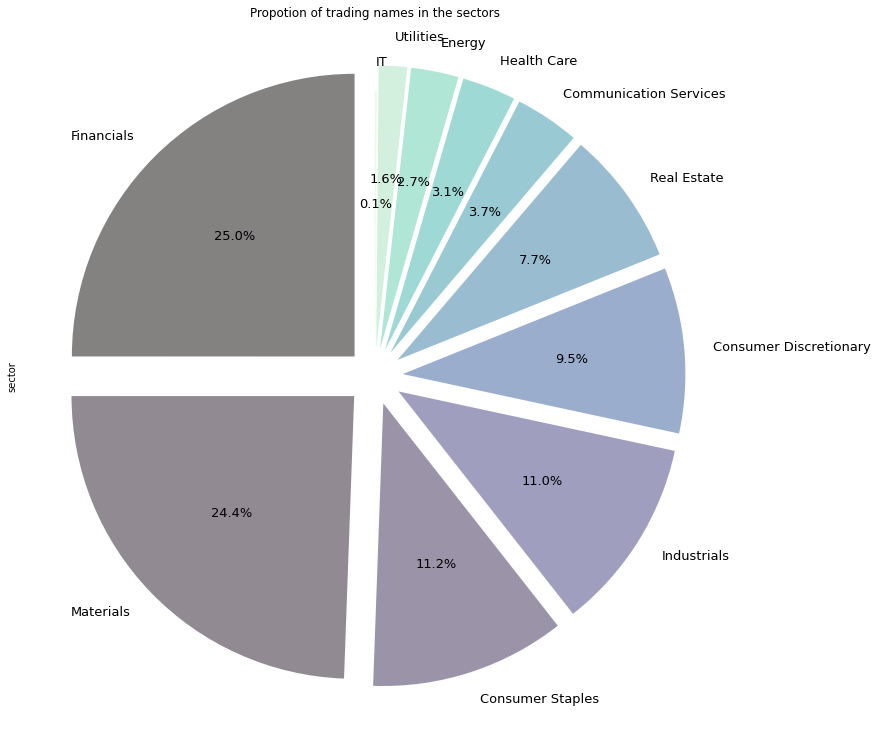

In [72]:
#parameters for the pie plot
kwargs = dict(
    startangle = 90,
    colormap   = 'mako',
    fontsize   = 13,
    explode    = (0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.01),
    figsize    = (100,13),
    autopct    = '%1.1f%%',
    wedgeprops ={'alpha':0.5},
    title      = "Propotion of trading names in the sectors")

#create the plot in the sector column
tadawul_stuks['sector'].value_counts().plot.pie(**kwargs)

- second plot insights: 

    This plot aims to show the number of trades for each sector during the last 20 years. As shown that the number of trades got increased in 2006 espacially on the real state and information technology sectors.

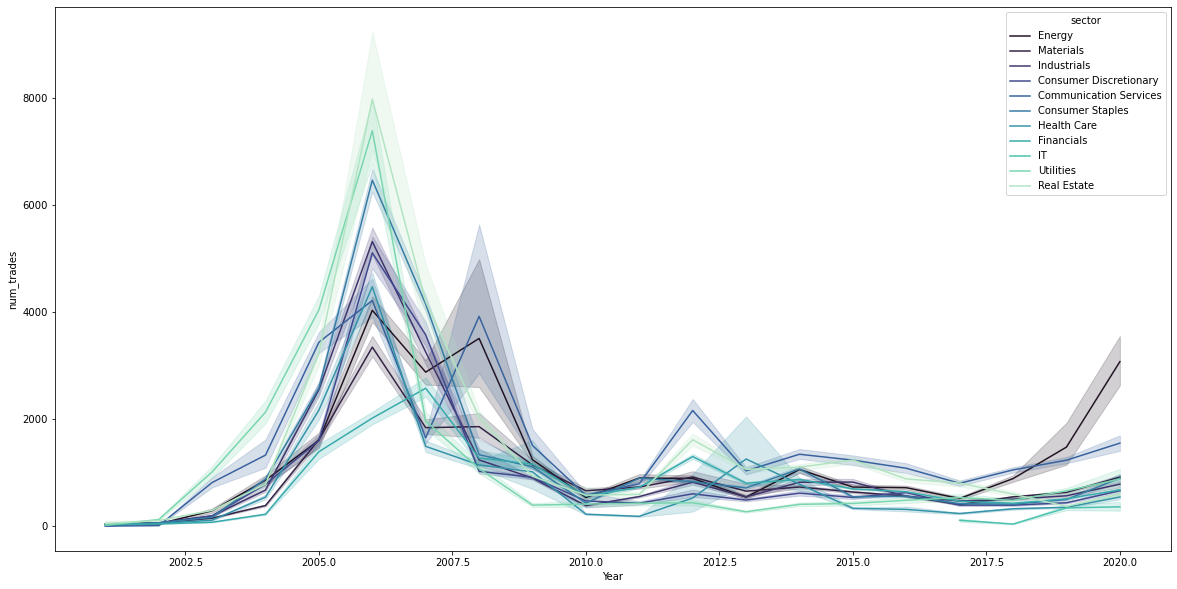

In [57]:
color = 'mako'
plt.subplots(figsize=(20,10)) 
sns.lineplot(data = tadawul_stuks,
             x="Year",
             y="num_trades",
             hue="sector",
            palette=color)
sns.cubehelix_palette(as_cmap=True)

- 3rd plot insights: 

    Close & Open :
    
    close_price  and open_price in bupa arabia for cooperative insurance  
          the highr median in 2020 then 2019 lastly  2018
          the highr variation 2019 then  2018 lastly  2020
          no outliers
    
    close_price  and open_price in company for cooperative insurance 
          the highr median in 2020 then 2019 lastly  2018
          the highr variation 2019 then  2018 lastly  2020
          2020 has  outliers
     
    close_price  and open_price in alrajhi
          the highr median in 2020 then 2018 lastly  2019
          the highr variation 2018 then  2019 lastly  2020
          2020 has  outliers
    
    
    
    close_price and open_price in national commercial bank
          the highr median in 2019 then 2018 lastly  2020
          the highr variation 2019 then  2018 lastly  2020
          no outliers
     

In [235]:
result=tadawul_stuks.loc[(tadawul_stuks['sector']=='Financials') & (tadawul_stuks['Year']> 2017)]

result=result.sort_values(by='high_price', ascending=False, na_position='first').head(2000)

Text(0.5, 1.0, 'open  price for Financials sector')

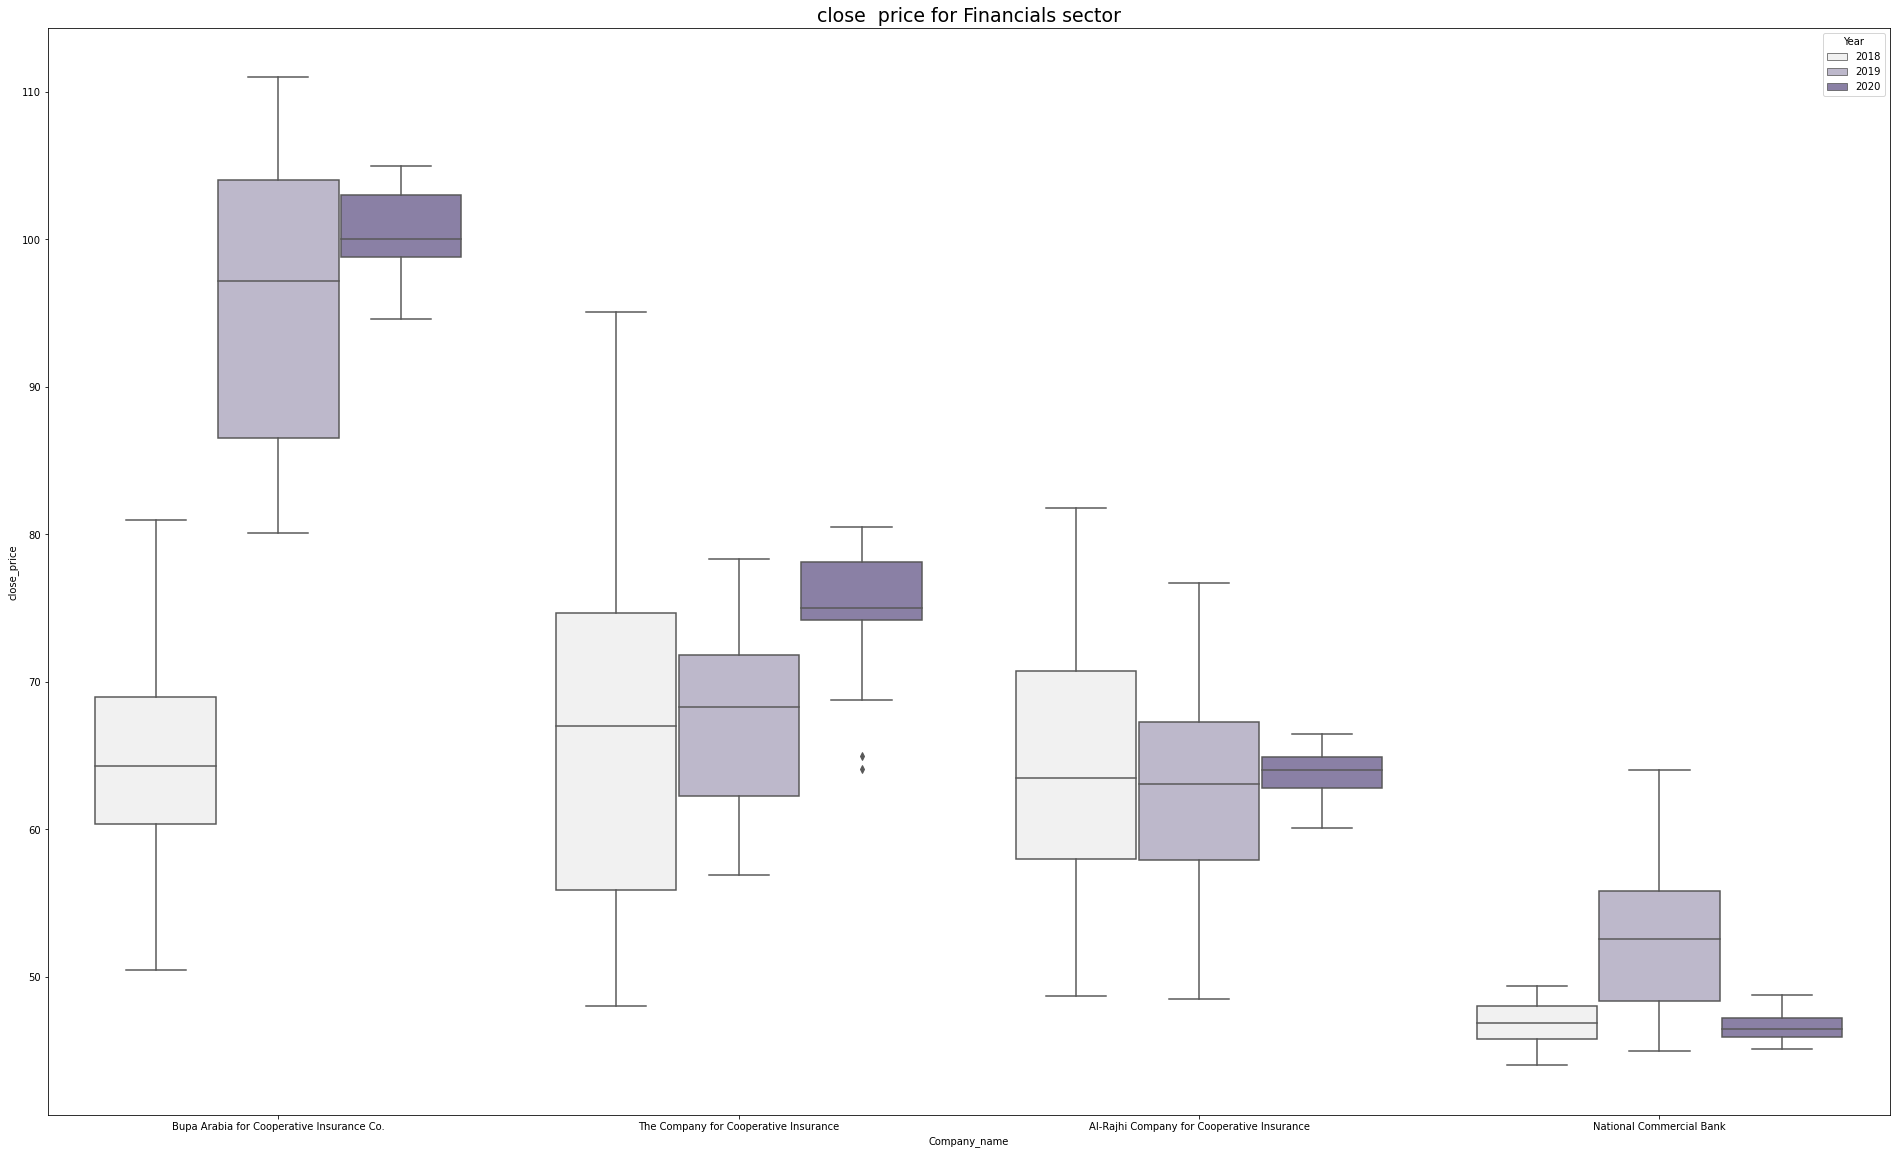

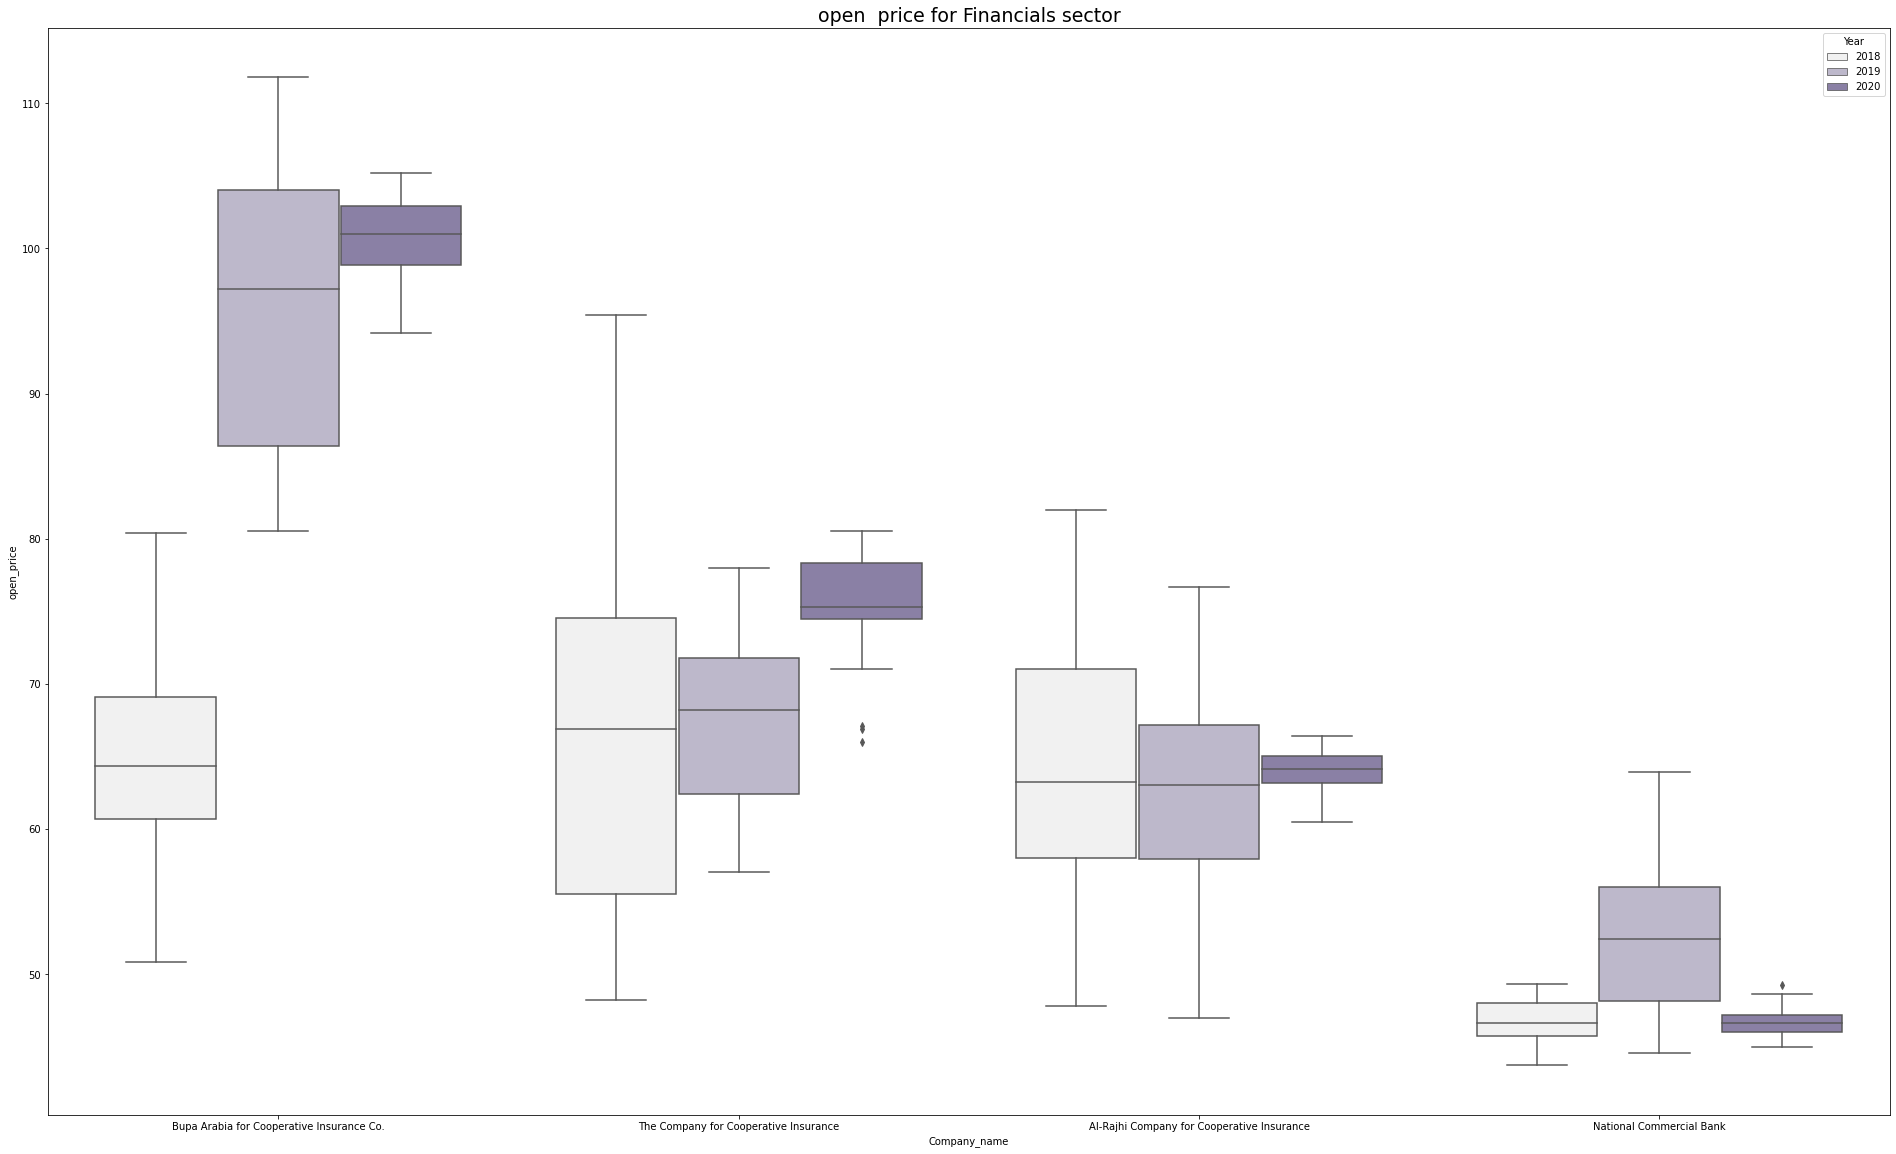

In [281]:
xh = result['Company_name']

fig, ax1 = plt.subplots(figsize =(33, 20)) 
sns.boxplot(ax = ax1, y = result['close_price'],  
                  x = xh, hue=result['Year'],color="#877aab") 

xh2 = result['Company_name']

fig, ax2 = plt.subplots(figsize =(33, 20)) 
sns.boxplot(ax = ax2, y = result['open_price'],  
                  x = xh2, hue=result['Year'],color="#877aab") 

ax1.set_title('close  price for Financials sector',fontsize=19)
ax2.set_title('open  price for Financials sector',fontsize=19)

In [239]:
result2=tadawul_stuks.loc[(tadawul_stuks['sector']=='IT') & (tadawul_stuks['Year']> 2017)]

result2=result2.sort_values(by='high_price', ascending=False, na_position='first').head(2000)


      Close  & Open:
 
     close_price and open_price in  2019 al moammar information systems 
           the highr median in 2019 then 2020
           the highr variation 2019 then  2020 
            no outliers
           
     close_price and open_price in arab sea information systems
           the highr median in 2020 then 2019 lastly 2018
           the highr variation in 2020 then 2019 lastly 2018 
            there are outliers in 2019 

    
 

Text(0.5, 1.0, 'close  price for IT sector')

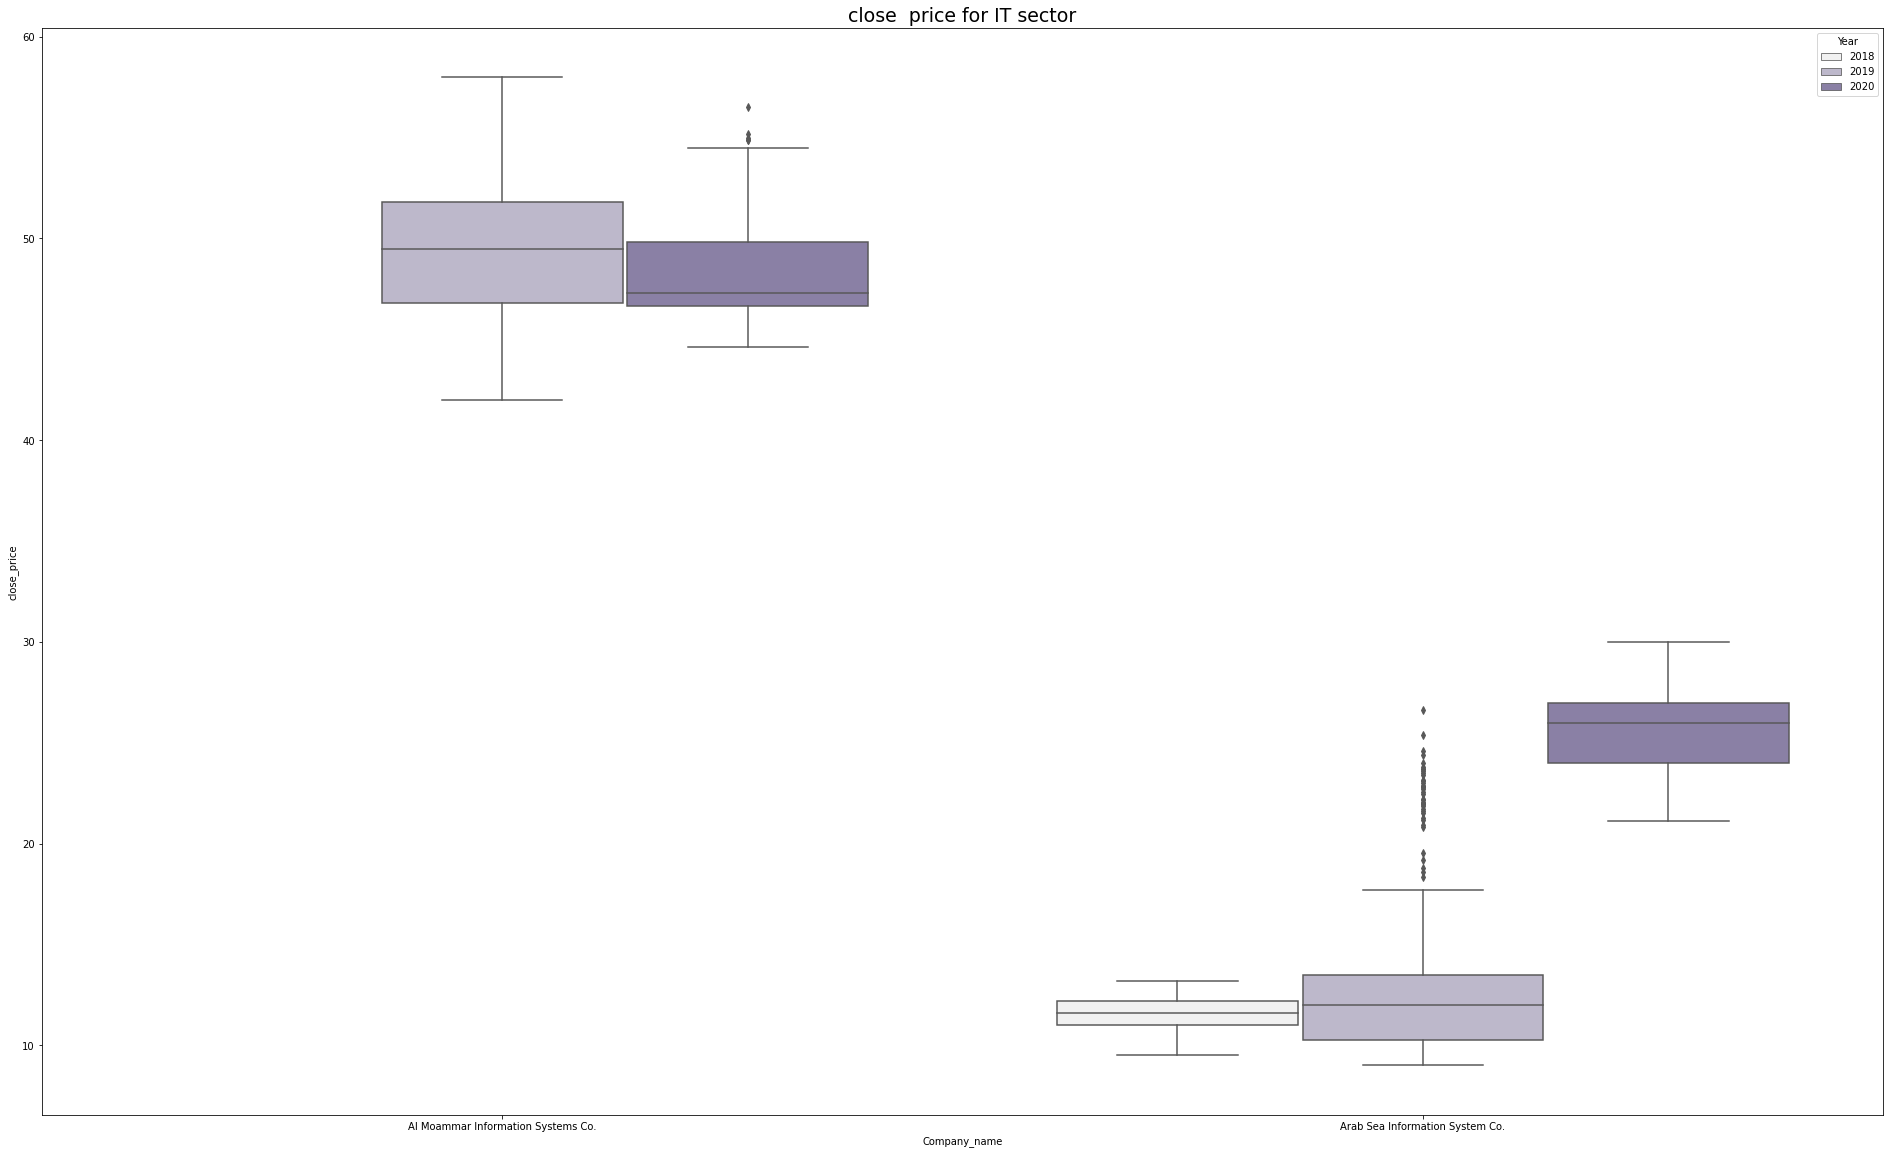

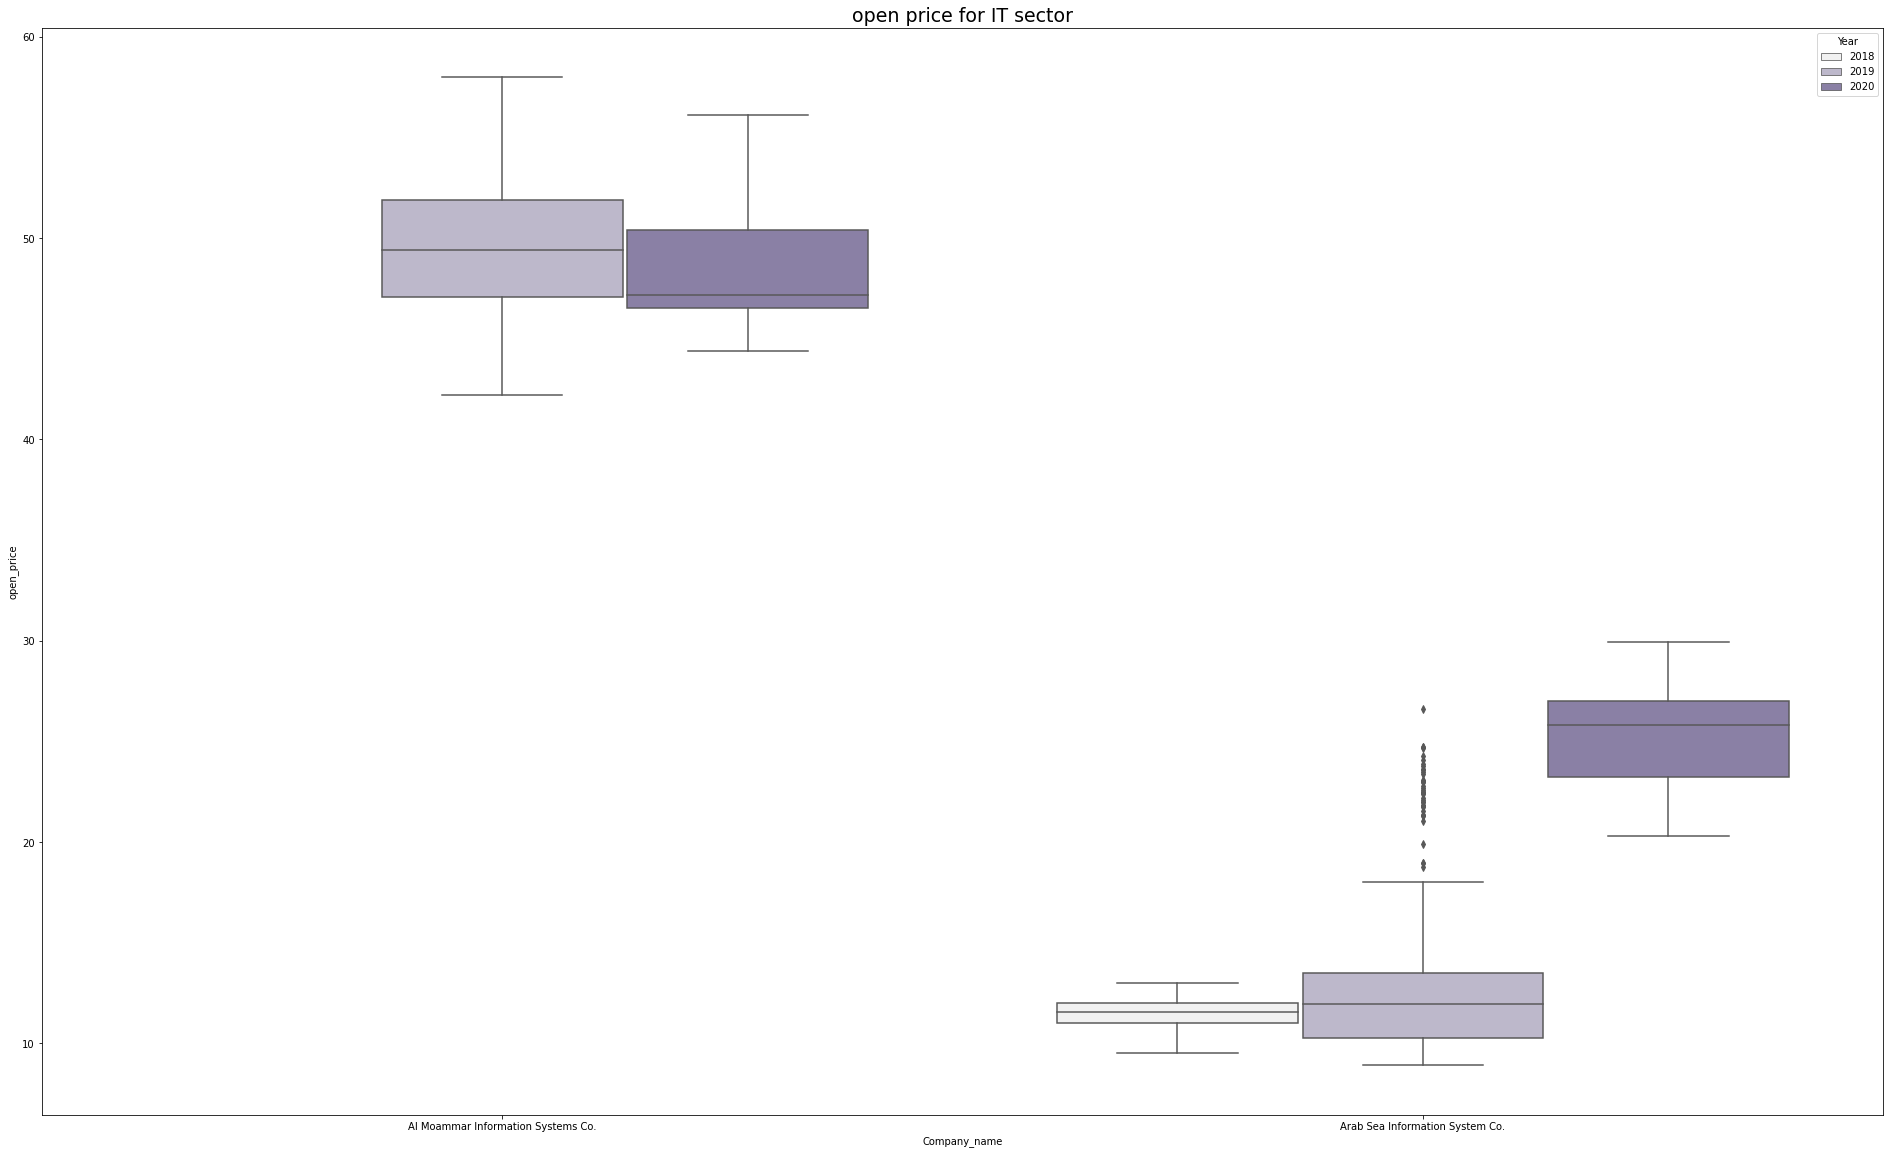

In [280]:
xh = result2['Company_name']

fig, ax1 = plt.subplots(figsize =(33, 20)) 
sns.boxplot(ax = ax1, y = result2['close_price'],  
                  x = xh, hue=result2['Year'],color="#877aab") 

xh2 = result2['Company_name']

fig, ax2 = plt.subplots(figsize =(33, 20)) 
sns.boxplot(ax = ax2, y = result2['open_price'],  
                  x = xh2, hue=result2['Year'],color="#877aab") 
ax2.set_title('open price for IT sector',fontsize=19)
ax1.set_title('close  price for IT sector',fontsize=19)

- 4th plot insights:

bar graph, we can conclude that the stock prices have double down from the year 2006 to that in 2007.

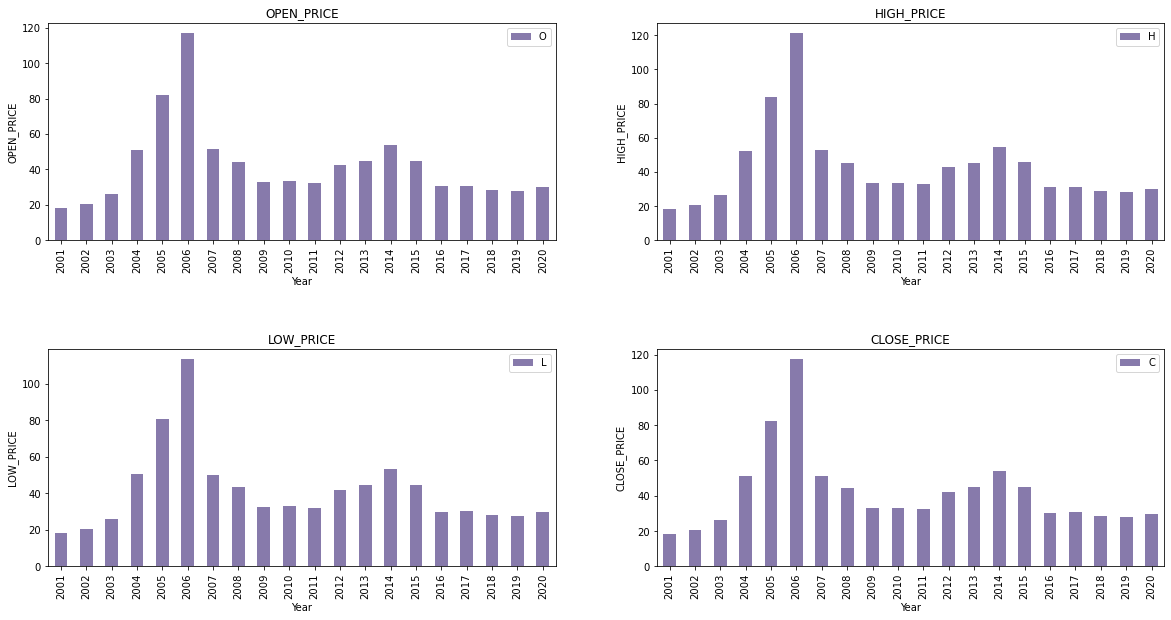

In [283]:
data_grouped = tadawul_stuks.groupby('Year').mean()
plt.subplots(figsize=(20,10))
plt.subplots_adjust(hspace=0.5)


 
for i, col in enumerate(['open_price', 'high_price', 'low_price', 'close_price']):
    plt.subplot(2,2,i+1)
    data_grouped[col].plot.bar(color="#877aab")
    plt.title(col.upper())
    plt.legend(col.upper())
    plt.ylabel(col.upper(),fontsize=10)


plt.show()

- 5th plot insights:
    
    
negative values in  Change are  represent almost 45.41% 

while positive values represent 43.26%
no change 11.34%
the bad and good changes very close  l to each other

Text(0.5, 1.0, ' ')

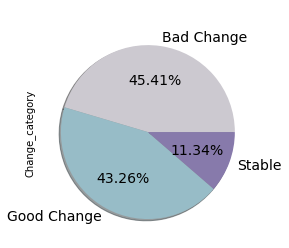

In [27]:
colors = ['#CCC9D0','#97BCC7',"#877aab"]

Change_category_plot = (tadawul_stuks['Change_category'].value_counts()).plot.pie( colors=colors,fontsize = 14, autopct='%.2f%%', shadow = True)
Change_category_plot.set_title(' ', fontsize = 14)

- 6 plot insights:
    
sectors are close   in either good or bad  Changes 
and no change is lowest in each sectors


<AxesSubplot:xlabel='sector', ylabel='count'>

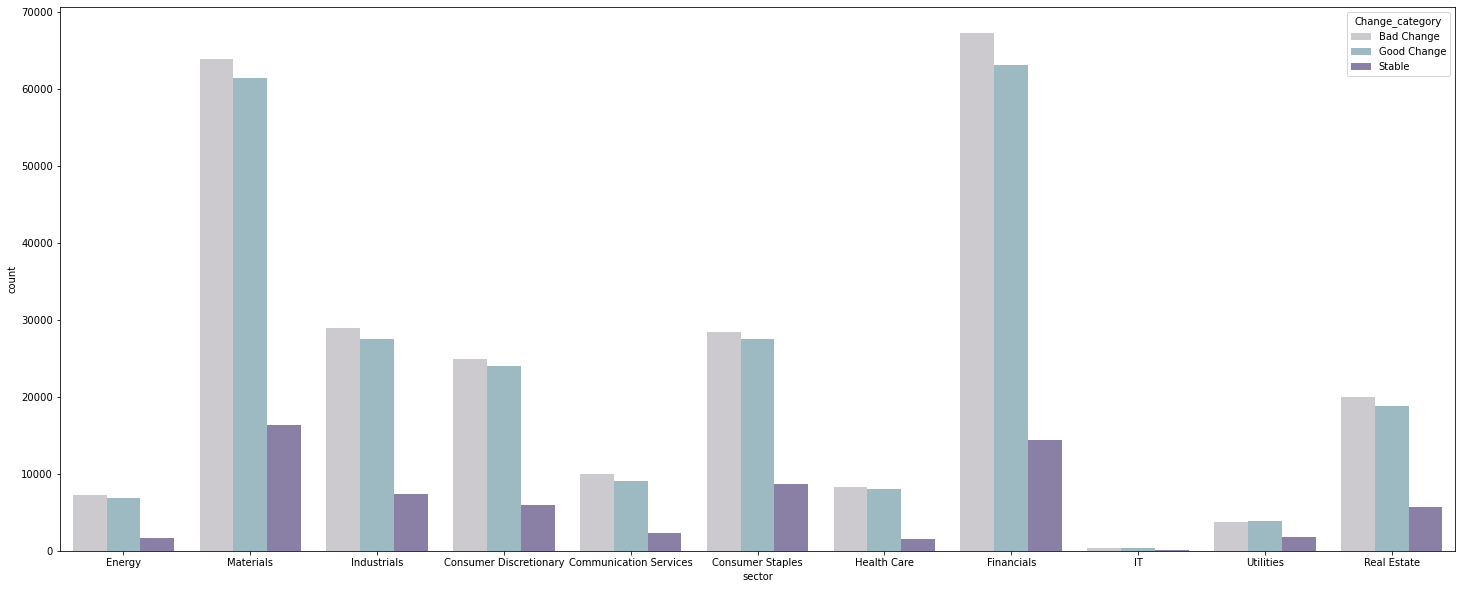

In [28]:

plt.figure(figsize=(25,10))

sns.countplot(x='sector', hue='Change_category' ,data = tadawul_stuks,palette=['#CCC9D0','#97BCC7',"#877aab"])


- 7 plot insights:


     In the next plots, shows us the closing price density for all companies in the field of (information technology, Utilities and Energy). 
    
    - IT: MIS have a close price highr than ARAB SEA
    - Utilities: GASCO have a close price highr than SAUDI ELECTRICITY
    - Energy: SARCO have a close price highr than SAUDI ELECTRICITY and BAHRI

In [ ]:
(tadawul_stuks["sector"]=="IT")

Text(0.5, 1.0, 'Distribution of close_price for top 2 corporation in Financials sector')

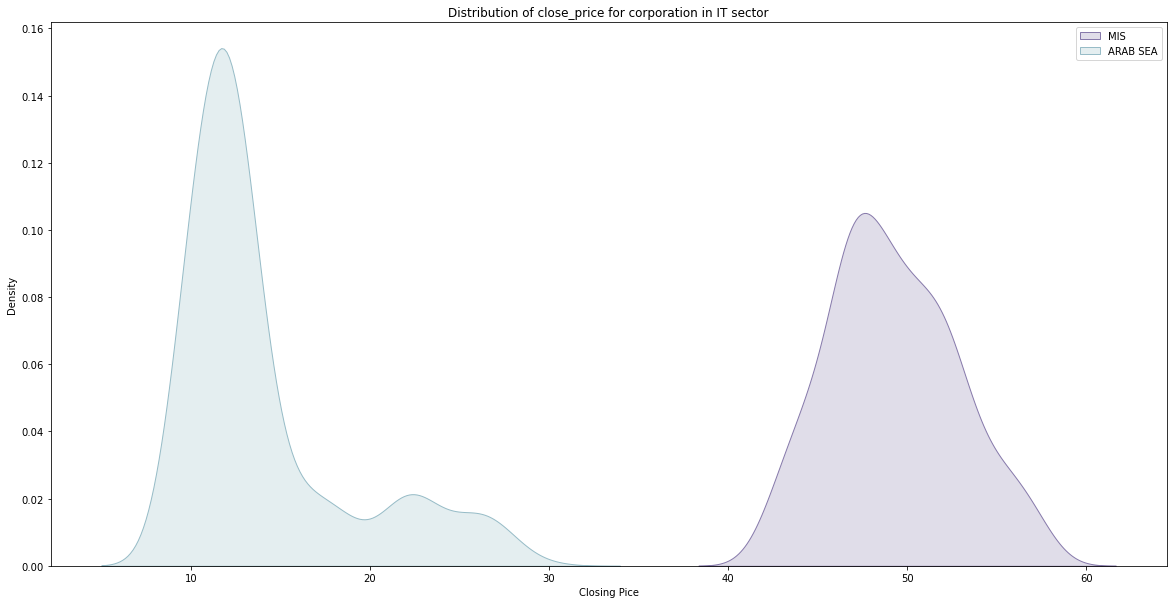

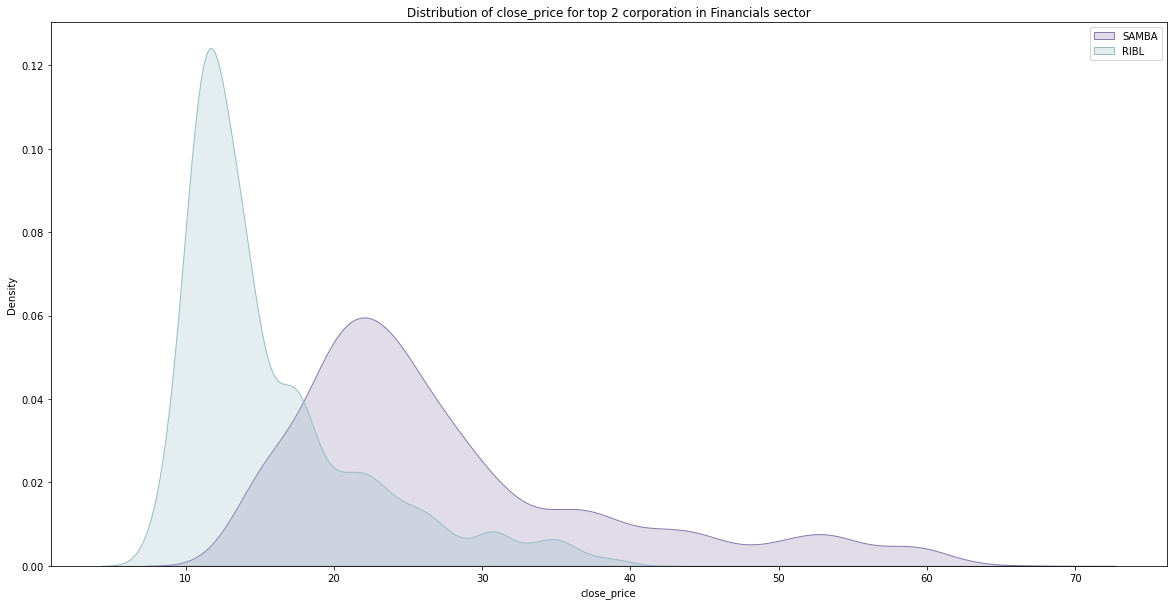

In [43]:
fig, ax = plt.subplots(figsize =(20, 10))
IT = sns.kdeplot(tadawul_stuks.close_price[(tadawul_stuks["trading_name"] == 'MIS') ],shade= True,  color='#877aab')
IT = sns.kdeplot(tadawul_stuks.close_price[(tadawul_stuks["trading_name"] == 'ARAB SEA') ], shade= True,  color='#97BCC7')
IT.set_ylabel('Density')
IT.set_xlabel('Closing Pice')
IT.legend(["MIS","ARAB SEA"],loc='upper right')
IT.set_title('Distribution of close_price for corporation in IT sector')

fig, ax1 = plt.subplots(figsize =(20, 10))
Financials = sns.kdeplot(tadawul_stuks.close_price[(tadawul_stuks["trading_name"] == 'SAMBA') ],shade= True,  color='#877aab')
Financials = sns.kdeplot(tadawul_stuks.close_price[(tadawul_stuks["trading_name"] == 'RIBL') ], shade= True,  color='#97BCC7')
IT.set_ylabel('Density')
IT.set_xlabel('Closing Pice')
Financials.legend(['SAMBA', 'RIBL'])
Financials.set_title('Distribution of close_price for top 2 corporation in Financials sector')


- 8 plot insights:
- It is clear from the following figure the number of trades on weekdays,
- we note that the number of trades increases at the beginning of the investment market opening on Saturday, while trades decrease at the end of the week on Thursday

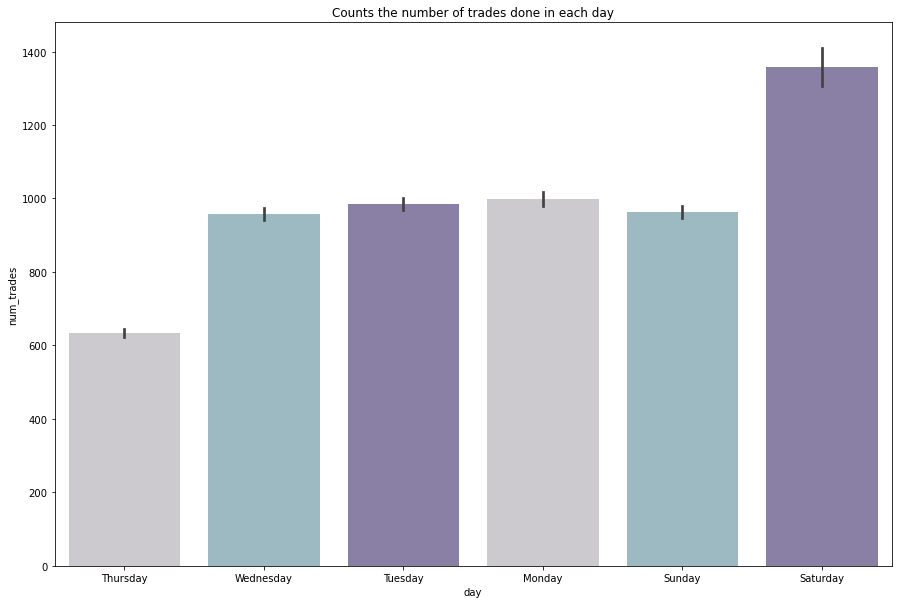

In [291]:
plt.figure(figsize = (15, 10))
sns.barplot( data = tadawul_stuks ,
            x = 'day', 
            y = 'num_trades',palette = ['#CCC9D0','#97BCC7',"#877aab"])
plt.title("Counts the number of trades done in each day")
plt.show()

- the number of trades in the months of the year, we note that the number of trades increases in the months at the beginning of the year, while the trades decrease at the end of the year

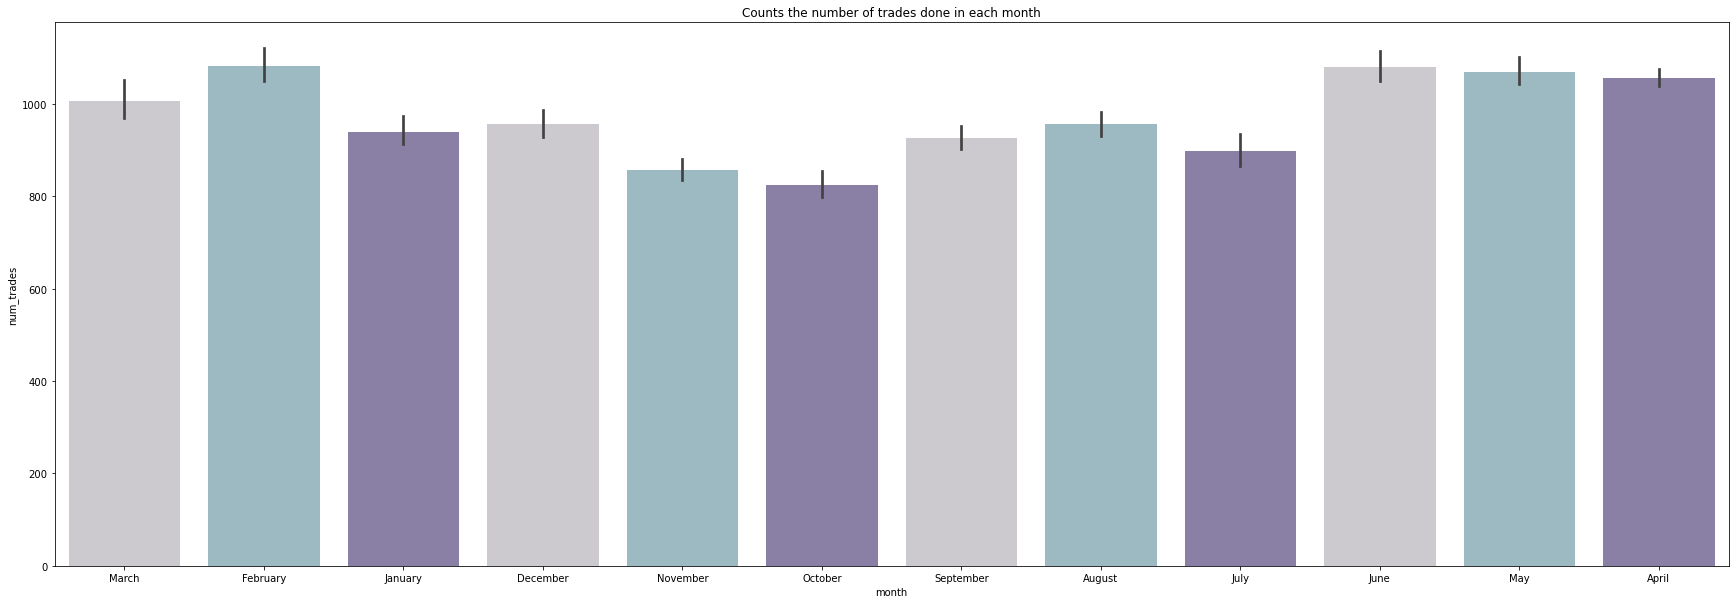

In [300]:
plt.figure(figsize = (30, 10))
sns.barplot( data = tadawul_stuks ,
            x = 'month', 
            y = 'num_trades',palette = ['#CCC9D0','#97BCC7',"#877aab"])
plt.title("Counts the number of trades done in each month")
plt.show()

   - 9 plot insights:

   trade distrbution Rises each year but in  2020 it is break down
   
    we can see one peak in open_price, high_price, low_price and  close_price which means the data has no varied  regions, And the Volume data is right-skewed.
    
    the highst price in open_price, high_price, low_price, close_price is more than 6000
    
    the lowest price in open_price, high_price, low_price, close_price is 0
    
     we can see all the relationships on daily returns between all the featres. A quick glance shows an interesting correlation between close price   and open , high and low price daily returns. 
    
    
    
    

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 1008x360 with 0 Axes>

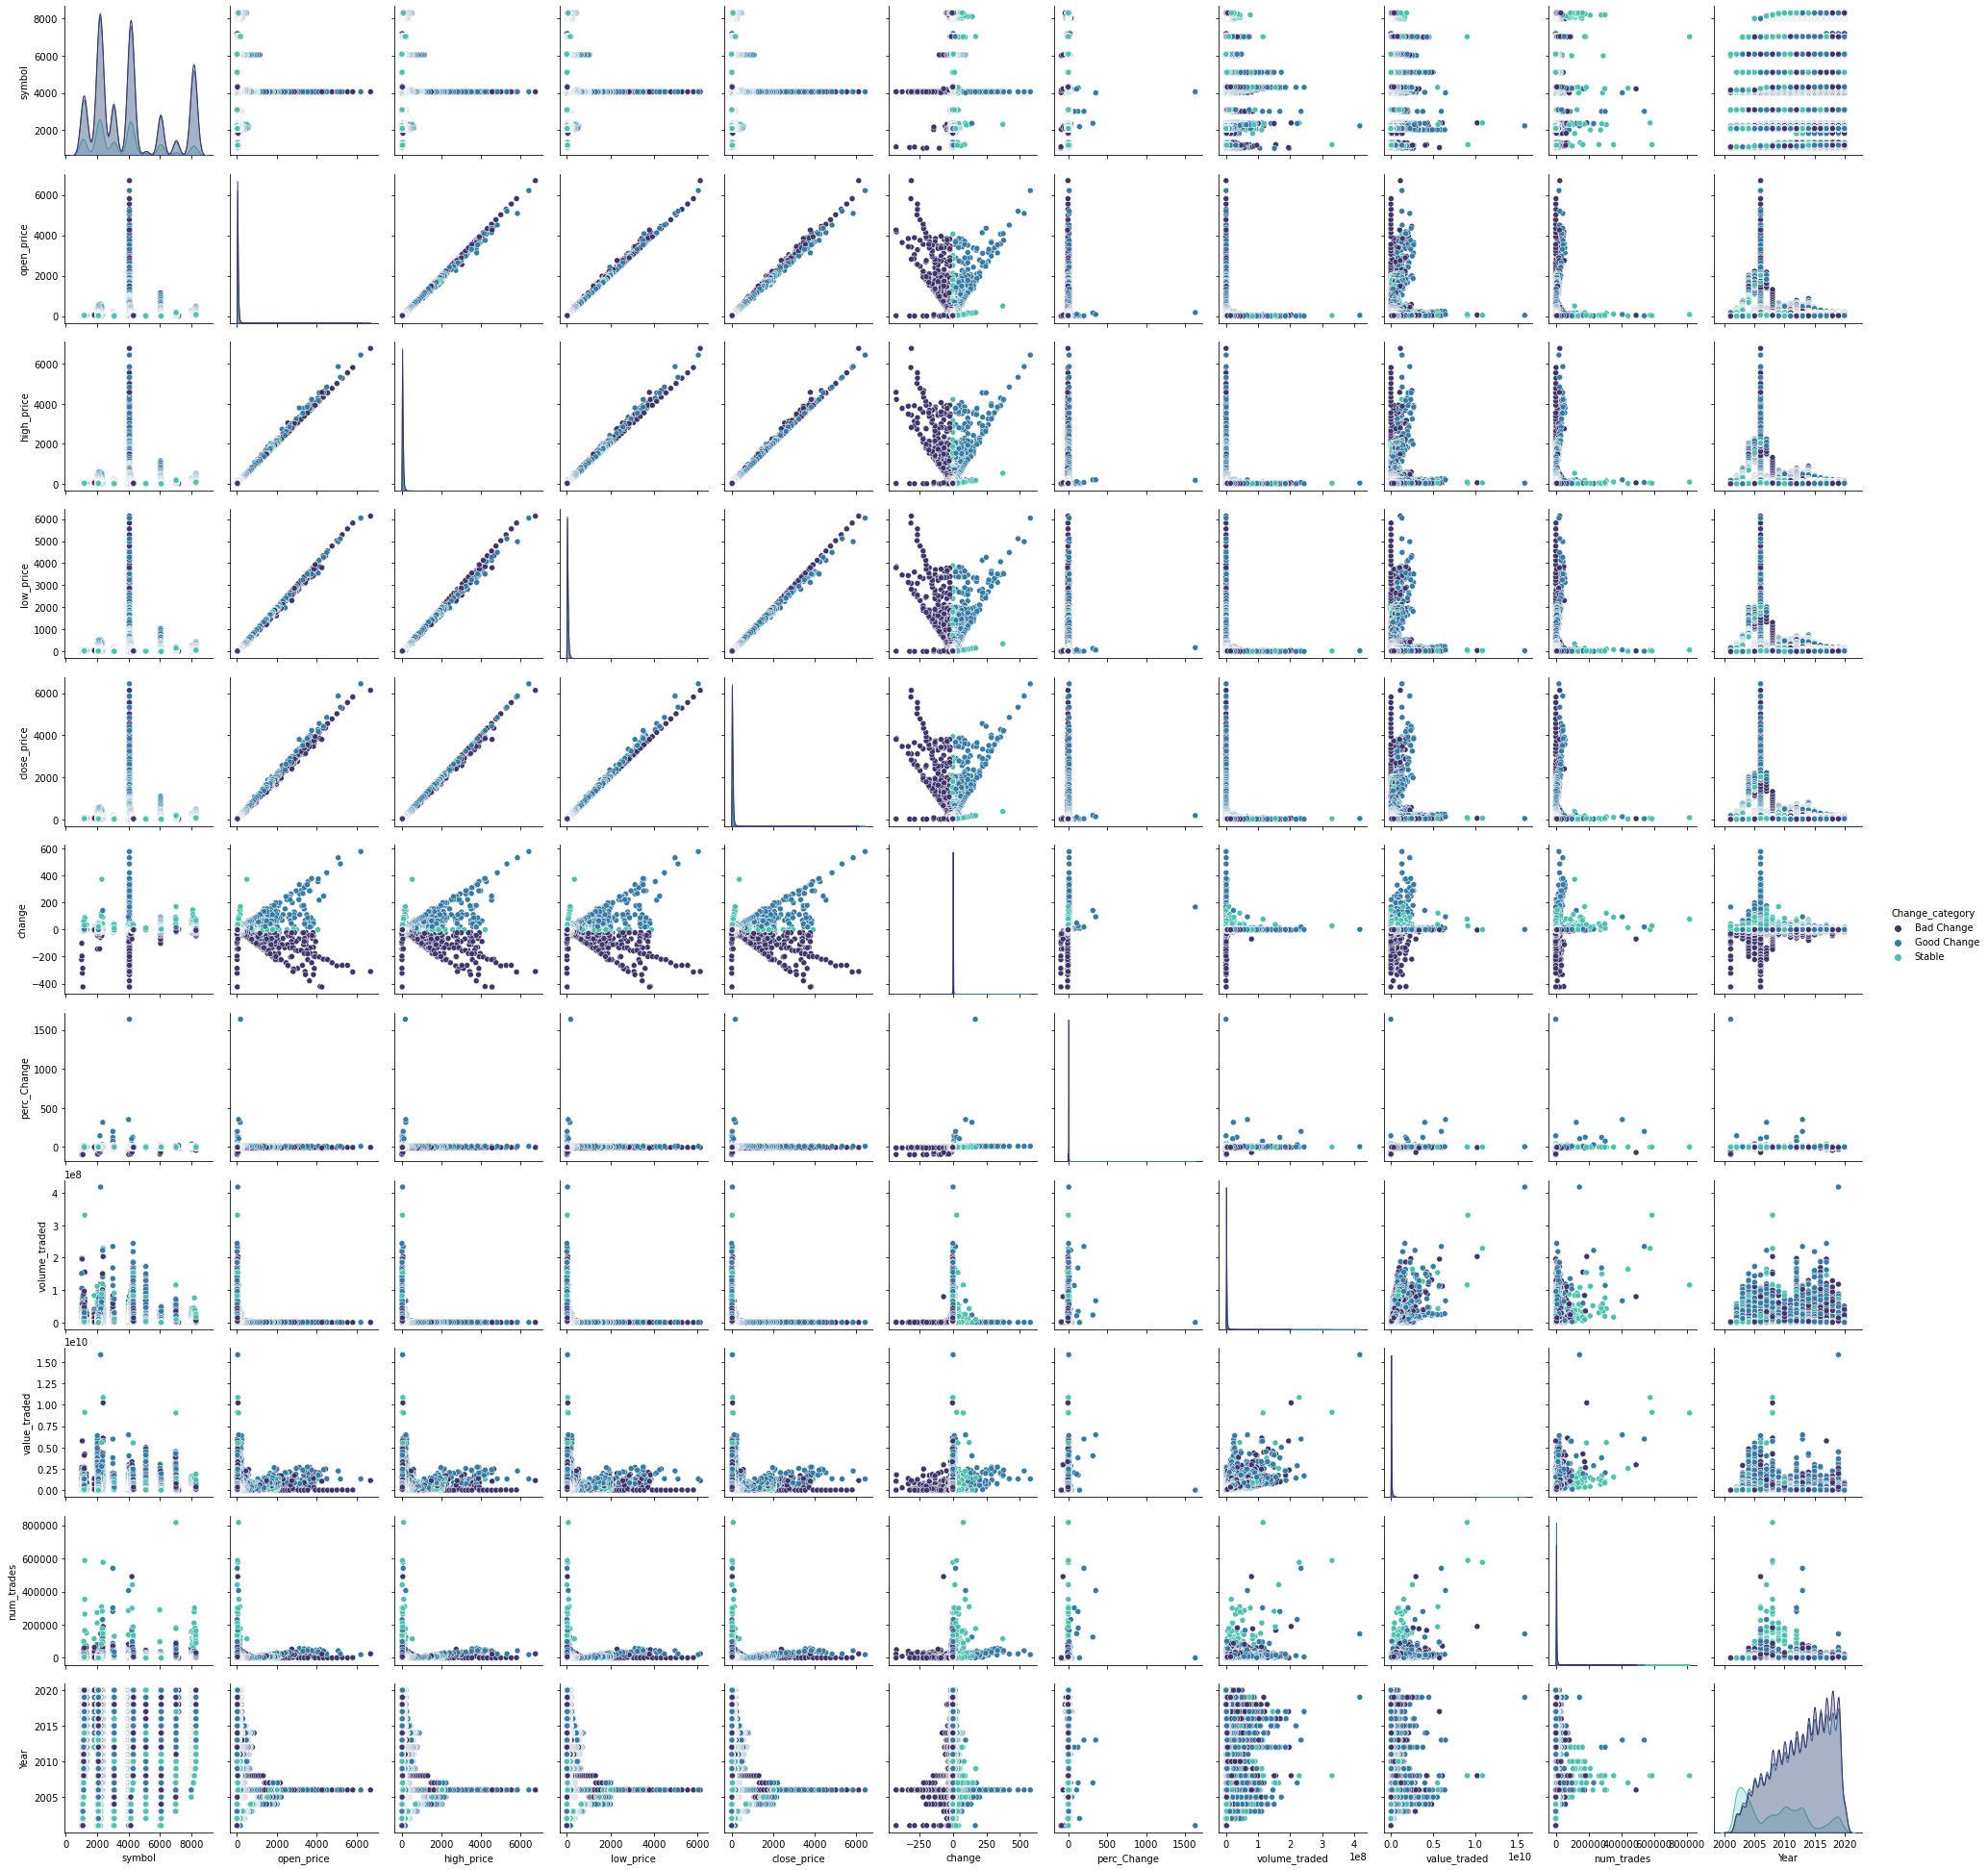

In [73]:
plt.figure(figsize=(14, 5))
sns.pairplot(tadawul_stuks, hue='Change_category', palette=color)
plt.show()

In [ ]:
#dff=tadawul_stuks['open_price','close_price','high_price','low_price','volume_traded','value_traded','num_trades','Year']
tadawul_stuks2 = tadawul_stuks.drop(['symbol','Company_name','trading_name','sector','date' ,'perc_Change'], axis = 1)

plt.figure(figsize=(14, 5))
sns.pairplot(tadawul_stuks2, hue='Change_category')
plt.show()

- 10 plot insights:

higer relationships are between open_price, high_price, low_price, close_price

In [61]:
import ppscore as pps
from sklearn.metrics import plot_confusion_matrix
dd = tadawul_stuks.drop(['symbol','Company_name','trading_name','sector','date' ], axis = 1)
x =['open_price', 'high_price', 'low_price', 'perc_Change','volume_traded','value_traded','num_trades','Year']
y=dd["close_price"]
#numerics
#pps.score(dd, "feature_column",'target')
pps.matrix(dd)

c=pps.matrix(dd)
c

matrix_df = pps.matrix(dd)[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')
sns.heatmap(matrix_df, vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True)

ModuleNotFoundError: No module named 'ppscore'